# Predicting Student Social Media Addiction and Its Academic & Mental Health Impact

## 1. Introduction

Social media has become an integral part of students’ daily lives. While it enables connectivity and learning, excessive usage can negatively impact academic performance, mental health, sleep patterns, and interpersonal relationships.

This project uses a real-world dataset from Kaggle to:

 - Quantify social media addiction

 - Analyze its academic and mental health consequences

 - Build predictive machine learning models to identify at-risk students

## 2. Objectives

1. To explore patterns in students’ social media usage and addiction levels using exploratory data analysis (EDA).

2. To examine the relationship between social media addiction, academic performance, and mental health indicators such as sleep duration and mental health scores.

3. To predict the severity of social media addiction using Linear Regression.

4. To classify whether social media usage negatively affects academic performance using Logistic Regression.

5. To identify students at high risk of social media addiction using a Random Forest classifier and analyze key contributing factors through feature importance.

## 3. Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( mean_squared_error, r2_score,
     accuracy_score, classification_report, confusion_matrix)

import pickle
import warnings
warnings.filterwarnings('ignore')

## 4. Load Dataset

In [3]:
df = pd.read_csv("Students Social Media Addiction.csv")
df.head(20)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


## 5. Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [4]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


##### Key Variables:

- Avg_Daily_Usage_Hours

- Sleep_Hours_Per_Night

- Mental_Health_Score

- Conflicts_Over_Social_Media

- Addicted_Score (Target – Regression)

- Affects_Academic_Performance (Target – Classification)

## 6. Exploratory Data Analysis (EDA)

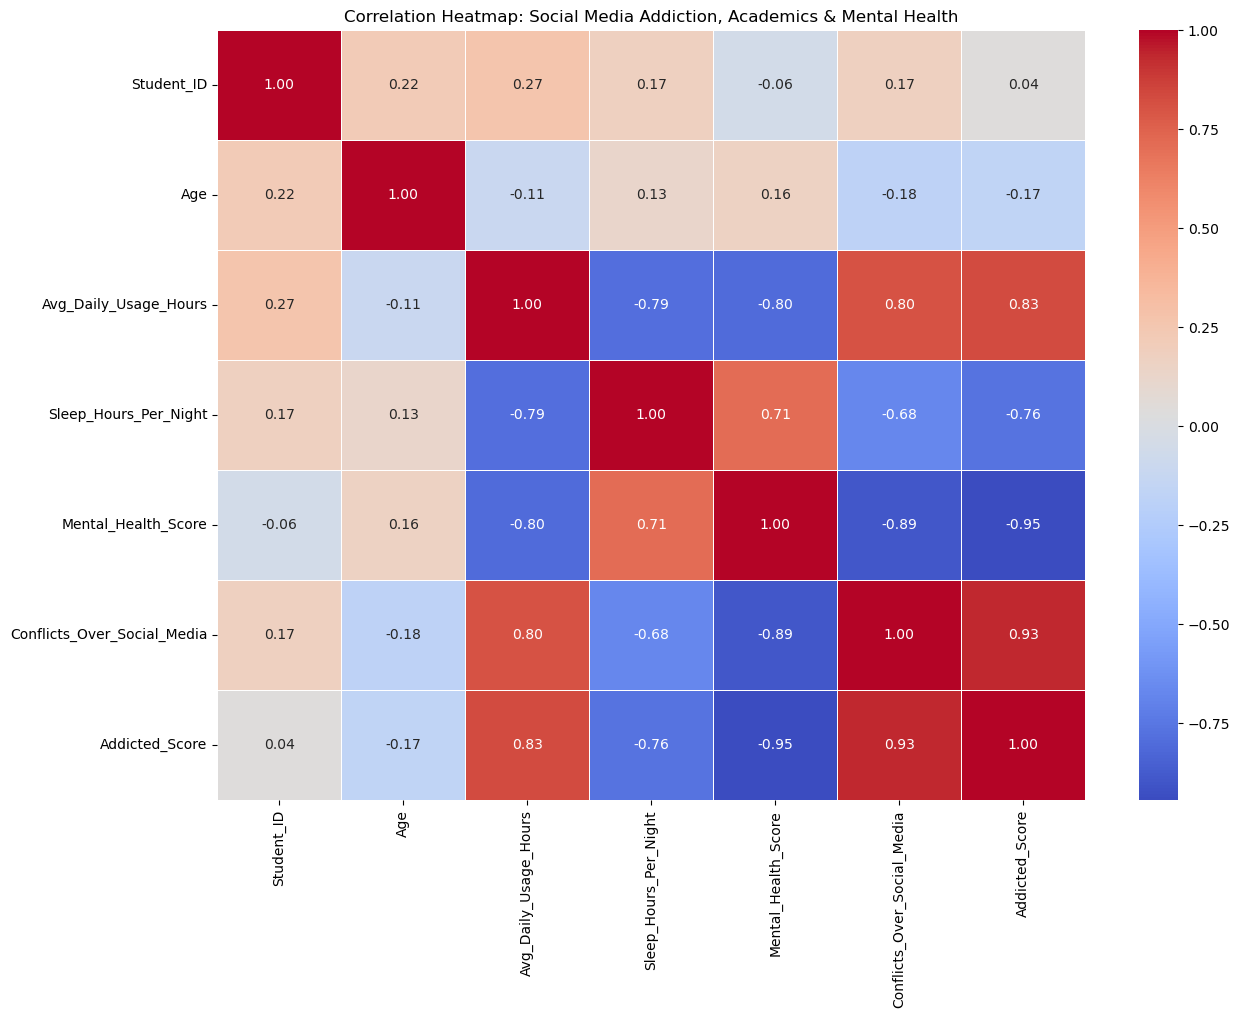

In [5]:
# Correlation Heatmap

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", 
            cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap: Social Media Addiction, Academics & Mental Health")
plt.show()

Key insights from the correlation heatmap:

1. The above correlation heatmap helped identify strong relationships between social media usage, addiction score, sleep deprivation, and academic performance.
2. Variables like daily usage hours and conflicts showed positive correlation with addiction, while sleep and mental health scores showed negative correlation

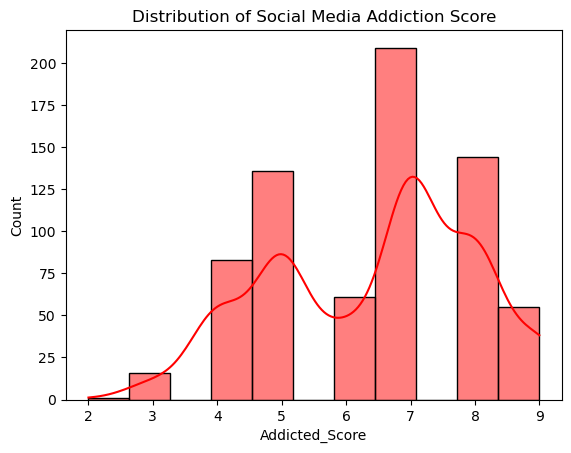

In [6]:
# Addiction Score Distribution

sns.histplot(df['Addicted_Score'], color = 'red', kde=True)
plt.title("Distribution of Social Media Addiction Score")
plt.show()

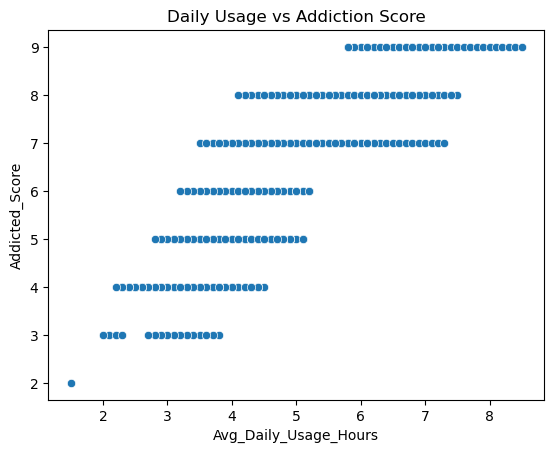

In [7]:
# Usage vs Addiction

sns.scatterplot(
    x='Avg_Daily_Usage_Hours',
    y='Addicted_Score',
    data=df
)
plt.title("Daily Usage vs Addiction Score")
plt.show()

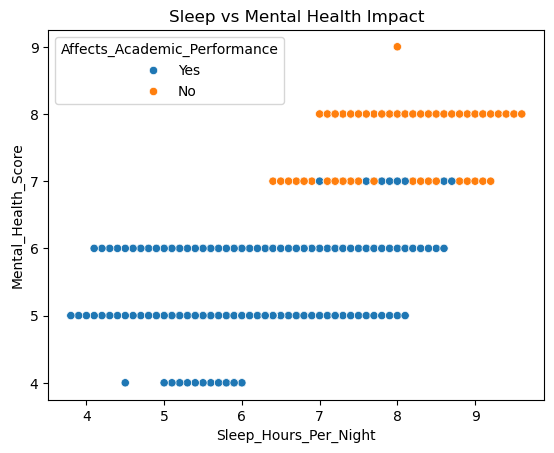

In [8]:
# Sleep vs Mental Health

sns.scatterplot(
    x='Sleep_Hours_Per_Night',
    y='Mental_Health_Score',
    hue='Affects_Academic_Performance',
    data=df,
)
plt.title("Sleep vs Mental Health Impact")
plt.show()

## 7. Data Preprocessing

In [5]:
# Categorical Columns

categorical_cols = [
    'Gender',
    'Academic_Level',
    'Country',
    'Most_Used_Platform',
    'Relationship_Status'
]

In [6]:
# Encode Categorical Variables

df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)
df_encoded.head(10)

,Student_ID,Age,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Academic_Level_High School,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
0,1,19,5.2,Yes,6.5,6,3,8,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,22,2.1,No,7.5,8,0,3,True,False,...,False,False,False,True,False,False,False,False,False,True
2,3,20,6.0,Yes,5.0,5,4,9,False,False,...,False,False,True,False,False,False,False,False,False,False
3,4,18,3.0,No,7.0,7,1,4,True,True,...,False,False,False,False,False,False,False,True,False,True
4,5,21,4.5,Yes,6.0,6,2,7,True,False,...,False,False,False,False,False,False,False,False,True,False
5,6,19,7.2,Yes,4.5,4,5,9,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,23,1.5,No,8.0,9,0,2,True,False,...,True,False,False,False,False,False,False,False,False,True
7,8,20,5.8,Yes,6.0,6,2,8,False,False,...,False,True,False,False,False,False,False,False,True,False
8,9,18,4.0,No,6.5,7,1,5,True,True,...,False,False,True,False,False,False,False,False,False,True
9,10,21,3.3,No,7.0,7,1,4,False,False,...,False,False,False,False,False,False,False,False,True,False


In [7]:
# Encode Classification Target

df_encoded['Affects_Academic_Performance'] = (
    df_encoded['Affects_Academic_Performance']
    .map({'Yes': 1, 'No': 0})
)

In [8]:
# Feature Scaling

numerical_cols = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Mental_Health_Score'
]

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(
    df_encoded[numerical_cols]
)

## 8. Linear Regression - Predicting Addicted Score

In [19]:
X_lr = df_encoded.drop(
    ['Student_ID', 'Addicted_Score', 'Affects_Academic_Performance'],
    axis=1
)

y_lr = df_encoded['Addicted_Score']

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=45
)

lr = LinearRegression()
lr.fit(X_lr_train, y_lr_train)

y_lr_pred = lr.predict(X_lr_test)

#### Evaluation

In [20]:
print("RMSE:", np.sqrt(mean_squared_error(y_lr_test, y_lr_pred)))
print("R² Score:", r2_score(y_lr_test, y_lr_pred))

RMSE: 0.35931987353605377
R² Score: 0.9494972799640209


In [21]:
# Making Prediction Using Trained Model

new_student = pd.DataFrame({
    'Age': [21],
    'Avg_Daily_Usage_Hours': [5.5],
    'Mental_Health_Score': [6],
    'Gender': ['Male'],
    'Academic_Level': ['Undergraduate'],
    'Country': ['India'],
    'Most_Used_Platform': ['Instagram'],
    'Relationship_Status': ['Single']
})

lr_features = X_lr.columns

# encode new input
new_student_encoded = pd.get_dummies(new_student)
new_student_encoded = new_student_encoded.reindex(
    columns=lr_features,
    fill_value=0
)

# predict
print("Predicted Addiction Score:", lr.predict(new_student_encoded)[0])

Predicted Addiction Score: 0.5008523532173399


#### Save the Model

In [40]:
# save the model
pickle.dump(lr, open("linear_model.pkl", "wb"))

print("linear_model.pkl created successfully")

# save features
pickle.dump(X_lr.columns, open("columns_lr.pkl", "wb"))

linear_model.pkl created successfully


#### Interpretation

- Higher daily usage and conflicts increase addiction

- Sleep and mental health scores reduce addiction risk

## 9. Logistic Regression - Predicting Academic Impact (Yes / No)

In [24]:
X_log = df_encoded.drop(
    ['Student_ID', 'Addicted_Score', 'Affects_Academic_Performance'],
    axis=1
)

y_log = df_encoded['Affects_Academic_Performance']

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_log_train, y_log_train)

y_log_pred = log_reg.predict(X_log_test)

#### Evaluation

In [25]:
print("Accuracy:", accuracy_score(y_log_test, y_log_pred))
print(classification_report(y_log_test, y_log_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        87

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [26]:
# Making Prediction Using Trained Model

new_student = pd.DataFrame({
    'Age': [21],
    'Avg_Daily_Usage_Hours': [5.5],
    'Mental_Health_Score': [6],
    'Gender': ['Male'],
    'Academic_Level': ['Undergraduate'],
    'Country': ['India'],
    'Most_Used_Platform': ['Instagram'],
    'Relationship_Status': ['Single']
})

log_reg_features = X_log.columns

# encode new input
new_student_encoded = pd.get_dummies(new_student)
new_student_encoded = new_student_encoded.reindex(
    columns=lr_features,
    fill_value=0
)

# predict
print("Affects_Academic_Performance {Yes: 1, No: 0}:", log_reg.predict(new_student_encoded)[0])

Affects_Academic_Performance {Yes: 1, No: 0}: 0


#### Save the Model

In [39]:
# save the model

pickle.dump(log_reg, open("logistic_model.pkl", "wb"))

print("logistic_model.pkl created successfully")

# save the features
pickle.dump(X_log.columns, open("columns_log.pkl", "wb"))

logistic_model.pkl created successfully


#### Interpretation

- High addiction strongly predicts academic decline

- Sleep deprivation is a key risk factor

## 10. Random Forest - Predicting High vs Low Addiction

In [29]:
# Create Binary Target

df_encoded['High_Addiction'] = np.where(
    df_encoded['Addicted_Score'] >= 7, 1, 0)

In [37]:
X_rf = df_encoded.drop(
    ['Student_ID', 'Addicted_Score', 'High_Addiction'],
    axis=1
)

y_rf = df_encoded['High_Addiction']

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=45)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_rf_train, y_rf_train)

y_rf_pred = rf.predict(X_rf_test)

#### Evaluation

In [32]:
print("Accuracy:", accuracy_score(y_rf_test, y_rf_pred))
print(classification_report(y_rf_test, y_rf_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        88

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [34]:
# Making Prediction Using Trained Model

new_student = pd.DataFrame({
    'Age': [21],
    'Avg_Daily_Usage_Hours': [5.5],
    'Mental_Health_Score': [6],
    'Gender': ['Male'],
    'Academic_Level': ['Undergraduate'],
    'Country': ['India'],
    'Most_Used_Platform': ['Instagram'],
    'Relationship_Status': ['Single']
})

rf_features = X_rf.columns

# encode new input
new_student_encoded = pd.get_dummies(new_student)
new_student_encoded = new_student_encoded.reindex(
    columns=rf_features,
    fill_value=0
)

print("High Addiction {Yes: 1, No: 0}:", rf.predict(new_student_encoded)[0])
print("Probability:", rf.predict_proba(new_student_encoded)[0])

High Addiction {Yes: 1, No: 0}: 0
Probability: [0.78 0.22]


#### Save the Model

In [38]:
# save the model

pickle.dump(rf, open("rf_model.pkl", "wb"))

print("rf_model.pkl created successfully")

# save the column features

pickle.dump(X_rf.columns, open("columns_rf.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

rf_model.pkl created successfully


#### Feature Importance

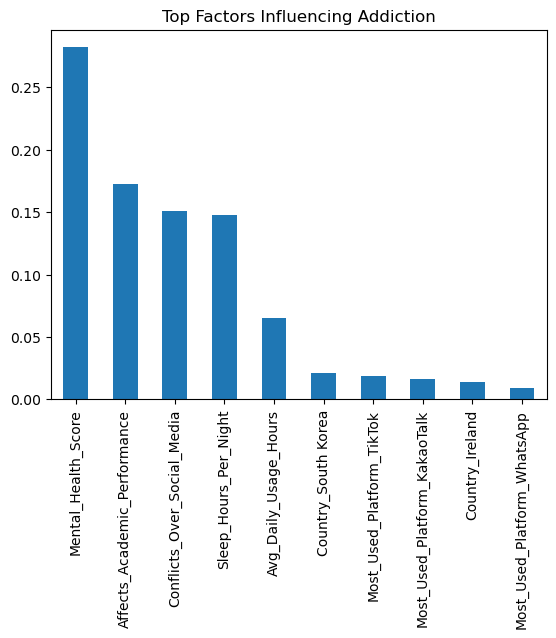

In [79]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10).plot(kind='bar')
plt.title("Top Factors Influencing Addiction")
plt.show()

## 9. Key Findings

- Daily usage hours is the strongest predictor of addiction

- Reduced sleep worsens mental health and academic performance

- High addiction correlates with academic decline and conflicts

- Random Forest outperforms linear models for classification

## 10. Conclusion

This project demonstrates how machine learning can be used to:

- Identify students at risk of social media addiction

- Predict academic and mental health consequences

- Support early intervention strategies in educational institutions

All three models complement each other:

- Linear Regression → Severity estimation

- Logistic Regression → Academic risk detection

- Random Forest → High-risk classification

## 11.  Future Work

1. Use Standard Psychological Scales

   Future studies can include validated psychological assessments such as PHQ-9 and GAD-7 to improve the reliability of mental health–related predictions.

3. Track Social Media Usage Over Time

   Collecting daily or weekly usage data would help identify trends and early warning signs of increasing addiction using time-series analysis.

5. Improve Model Explainability and Performance

   Further tuning of models and the use of explainability techniques can improve prediction accuracy and transparency.

7. Deploy as a Simple Web Application
   
   The model can be deployed as a basic web app to support early screening of students at risk of social media addiction.